# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


# **1. Data Validation**

This data set has 947 rows, 8 columns. I have validated all variables and I have made several changes after validation: remove rows with null values in calories, carbohydrate, sugar, protein and replace null values in high_traffic with "Low".

- recipe: 947 unique identifiers without missing values (895 after dataset cleaning). No cleaning is needed.
- calories: 895 non-null values. I fill 52 missed values with the mean grouped by category and servings.
- carbohydrate: 895 non-null values. I fill 52 missed values with the mean grouped by category and servings.
- sugar: 895 non-null values. I fill 52 missed values with the mean grouped by category and servings.
- protein: 895 non-null values. I fill 52 missed values with the mean grouped by category and servings.
- category: 11 unique values without missing values, whereas there were 10 values in the description. The extra valie is 'Chicken Breast'. I united it with the 'Chicken' value.
- servings: 6 unique values without missing values. By description, it should be numeric variable, but now it's character. Has two extra values: '4 as a snack' and '6 as a snack'. I united them with '4' and '6' and changed the column's type to integer. 
- high_traffic: only 1 non-null value ("High"). Replaced null values with "Low".

Moreover, I added **new columns: calories_1, carbohydrate_1, sugar_1, protein_1** as calories, carbohydrate, sugar, protein, multiplied by servings. They will replace calories, carbohydrate, sugar, protein in Visualization and Model fitting. 

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [70]:
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [71]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [72]:
# validate recipe
df['recipe'].nunique()

947

In [73]:
# validate calories
df['calories'].nunique()

891

In [74]:
# validate carbohydrate
df['carbohydrate'].nunique()

835

In [75]:
# validate sugar
df['sugar'].nunique()

666

In [76]:
# validate protein
df['protein'].nunique()

772

In [77]:
# validate category
df['category'].nunique()

11

In [78]:
# validate servings
df['servings'].nunique()

6

In [79]:
# validate high_traffic
df['high_traffic'].nunique()

1

In [80]:
df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [81]:
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [82]:
nutritional = ['calories', 'carbohydrate', 'sugar', 'protein']
num_names = nutritional + ['servings']

nutritional_1 = ['calories_1', 'carbohydrate_1', 'sugar_1', 'protein_1']
num_names_1 = nutritional_1 + ['servings']

In [83]:
# df[df['calories'].isna()].groupby(['category', 'servings'])['recipe'].count()

In [84]:
# create new dataframe for changing values and columns
# remove all recipes with null values in calories, carbohydrate, sugar and protein columns
# df2 = df[df['calories'].notna()]
df2 = df[list(df)]
# df["value"] = df.groupby(["category","servings"]).transform(lambda x: x.fillna(x.mean()))
for name in nutritional: 
    df2[name] = df2[name].fillna(df.groupby(["category","servings"])[name].transform('mean'))
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [85]:
# still 11 unique values
df2['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [86]:
# still 6 unique values
df2['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [87]:
df2.groupby(['servings'])['category'].count()

servings
1               175
2               183
4               389
4 as a snack      2
6               197
6 as a snack      1
Name: category, dtype: int64

There are only 2 and 1 recipes of "4 as a snack" and "6 as a snack" servings, so I'll rename them to "4" and "6" for simplicity and convert to numerical.

In [88]:
df2['servings'] = df2['servings'].replace({"4 as a snack": '4', "6 as a snack": '6'}).astype('int')
df2.groupby(['servings'])['recipe'].count()

servings
1    175
2    183
4    391
6    198
Name: recipe, dtype: int64

In [89]:
df2['category'] = df2['category'].replace({"Chicken Breast": 'Chicken'})
df2.groupby(['category'])['recipe'].count()

category
Beverages         92
Breakfast        106
Chicken          172
Dessert           83
Lunch/Snacks      89
Meat              79
One Dish Meal     71
Pork              84
Potato            88
Vegetable         83
Name: recipe, dtype: int64

In [90]:
# replace null values of high_traffic with Low

df2['high_traffic'].fillna("Low", inplace = True)
df2.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,764.641333,20.072,7.013333,66.528,Pork,6,High
1,2,35.480000,38.560,0.660000,0.920,Potato,4,High
2,3,914.280000,42.680,3.090000,2.880,Breakfast,1,Low
3,4,97.030000,30.560,38.630000,0.020,Beverages,4,High
4,5,27.050000,1.850,0.800000,0.530,Beverages,4,Low


In [91]:
# added new columns: nutritional components in all servings, not per one

for name in nutritional:
    df2[name + '_1'] = df2[name] * df2['servings']

In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recipe          947 non-null    int64  
 1   calories        947 non-null    float64
 2   carbohydrate    947 non-null    float64
 3   sugar           947 non-null    float64
 4   protein         947 non-null    float64
 5   category        947 non-null    object 
 6   servings        947 non-null    int64  
 7   high_traffic    947 non-null    object 
 8   calories_1      947 non-null    float64
 9   carbohydrate_1  947 non-null    float64
 10  sugar_1         947 non-null    float64
 11  protein_1       947 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 88.9+ KB


In [93]:
# drop receipe, because it's an id and it's useless for exploratory analysis and classification.
df2 = df2.drop('recipe', axis=1)

In [94]:
#validate any negative values in numeric variables
df2.describe()

,calories,carbohydrate,sugar,protein,servings,calories_1,carbohydrate_1,sugar_1,protein_1
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,439.210748,35.144413,9.060182,24.567001,3.477297,1507.228977,120.477181,31.177385,85.318466
std,442.354374,42.908525,14.448921,35.759721,1.732741,1863.729100,174.303334,53.908431,156.383007
min,0.140000,0.030000,0.010000,0.000000,1.000000,0.280000,0.100000,0.060000,0.000000
25%,114.410000,9.135000,1.795000,3.465000,2.000000,318.690000,24.250000,4.410000,9.595000
50%,306.900000,22.350000,4.720000,11.200000,4.000000,816.250000,62.720000,13.800000,35.280000
75%,598.995000,44.825000,9.565000,32.275000,4.000000,2060.640000,148.540000,33.900000,92.300000
max,3633.160000,530.420000,148.750000,363.360000,6.000000,17436.060000,2121.680000,521.820000,2180.160000


In [95]:
df2.drop_duplicates().shape

(924, 11)

# **2. Data Visualization**

I have investigated the target variable and features of the recipe, and the relationship between target variable and features. After the analysis, I decided to don't change variables.


## **Target Variable - high_traffic**

Since we need to predict the high_traffic, the high_traffic variable would be our target variable. 

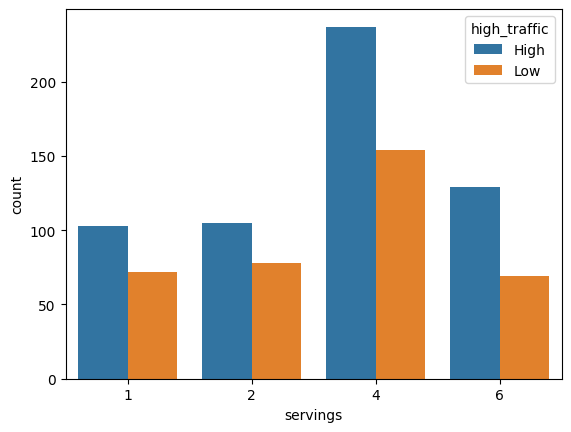

In [96]:
sns.countplot(df2, x="servings", hue="high_traffic")
plt.show()

Conclusion: for each serving, the amount of recipes with high traffic are more than the amount of recipes with low traffic, so this feature doesn't have a big influence on target variable.

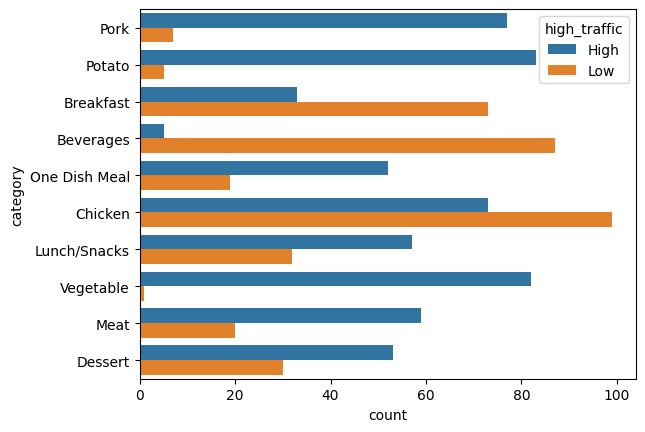

In [97]:
sns.countplot(df2, y="category", hue="high_traffic")
# plt.xticks(rotation=90)
plt.show()

Conclusion: 

Potato, Pork and Vegetable categories have **a lot more recipes with high traffic** than with low traffic. 

One Dish Meal, Lunch/Snacks, Meat, Dessert categories have just **more recipes with high traffic** than with low traffic. 

## Numeric Variables - calories, carbohydrate, sugar, protein

From the heatmap below, we can conclude that there is a moderate linear negative relationship in 5 variables - calories, carbohydrate, sugar, protein, servings. All values are close to 0, so they are weakly connected. 

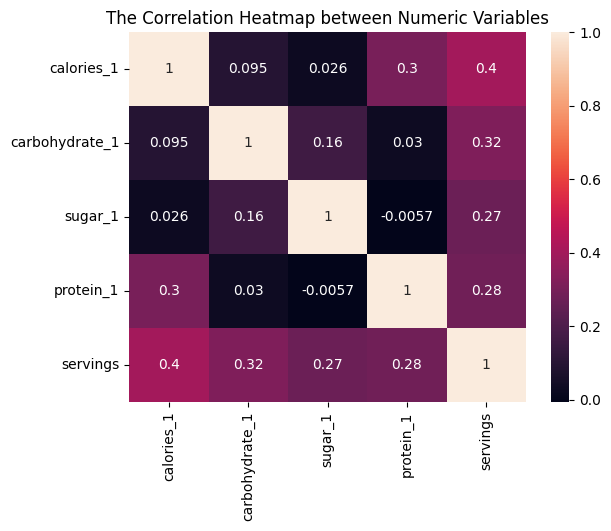

In [98]:
numeric = df2[num_names_1]
sns.heatmap(numeric.corr(), annot=True).set(title='The Correlation Heatmap between Numeric Variables');

## Categorical Variables - servings, category, high_traffic

I looked at the distribution of recipes by categorical variables. Servings = 4 and category Chicken are most popular values, that can say about people preferences and influence on high traffic.

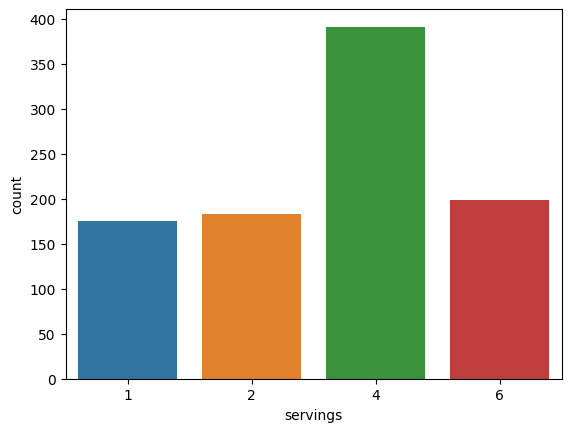

In [99]:
sns.countplot(df2, x="servings")
plt.show()

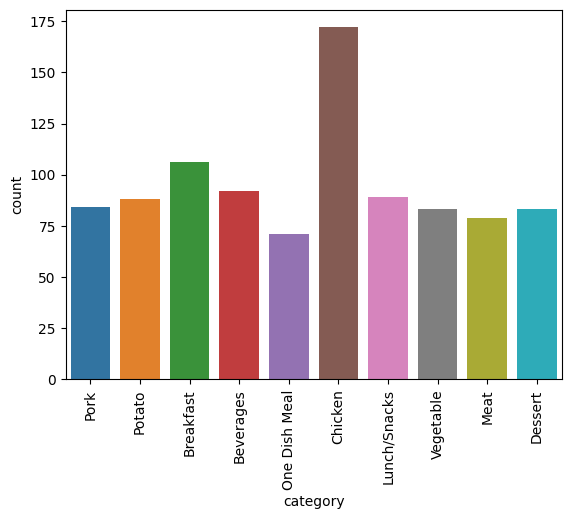

In [100]:
sns.countplot(df2, x="category")
plt.xticks(rotation=90)
plt.show()

On the boxplots below I'll check if there are outliers in original numerical features. No, there aren't.

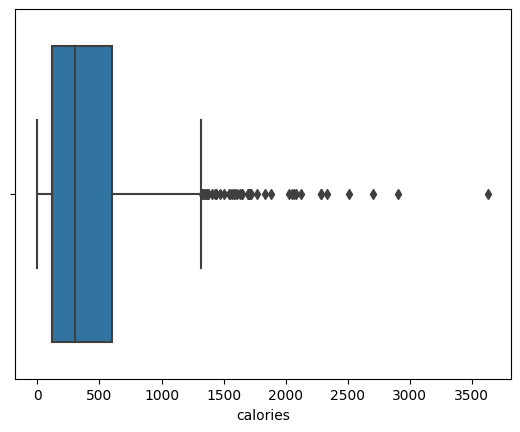

In [101]:
sns.boxplot(x='calories', data=df2)
plt.show()

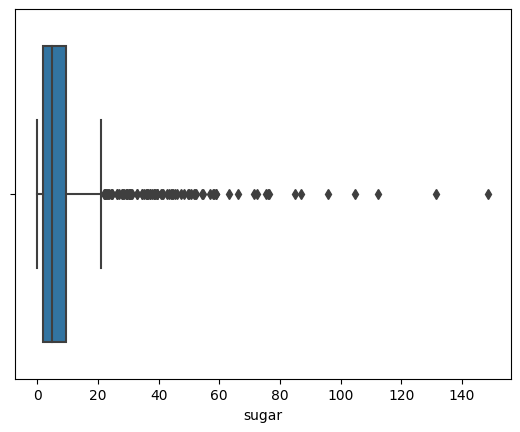

In [102]:
sns.boxplot(x='sugar', data=df2)
plt.show()

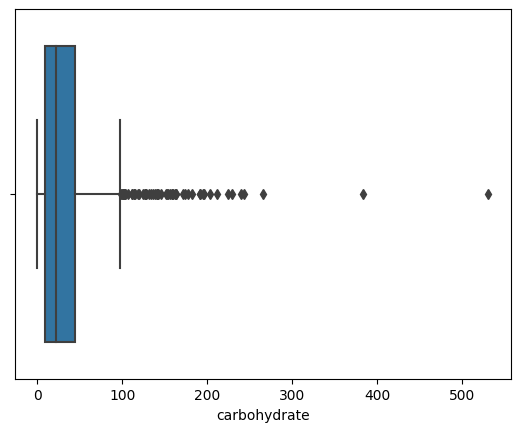

In [103]:
sns.boxplot(x='carbohydrate', data=df2)
plt.show()

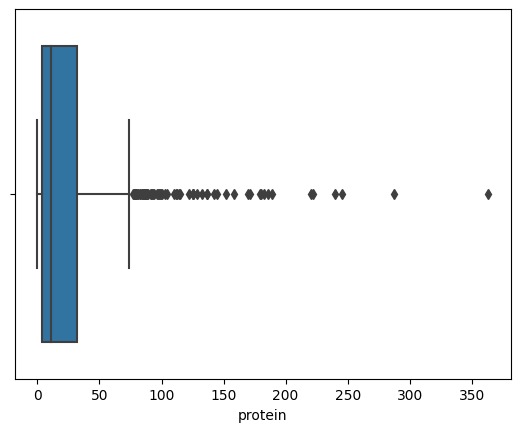

In [104]:
sns.boxplot(x='protein', data=df2)
plt.show()

From the bar charts below, we can see the most frequent categories in servings, category, high_traffic variables in the dataset.

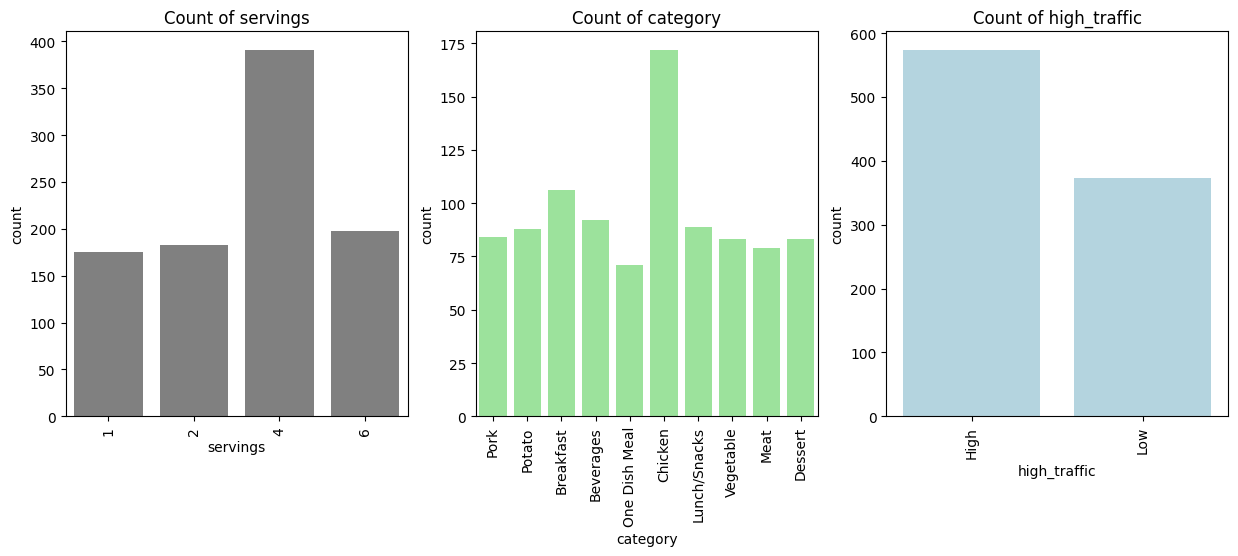

In [105]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(x=df2['servings'], color='gray', ax=axes[0]).set(title='Count of servings')
sns.countplot(x=df2['category'], color='lightgreen', ax=axes[1]).set(title='Count of category')
sns.countplot(x=df2['high_traffic'], color='lightblue', ax=axes[2]).set(title='Count of high_traffic')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

On the heatmap below I'll show the difference between the mean of high-traffic and the mean of low-traffic recepies, distributing by servings, categories and numerical features. 

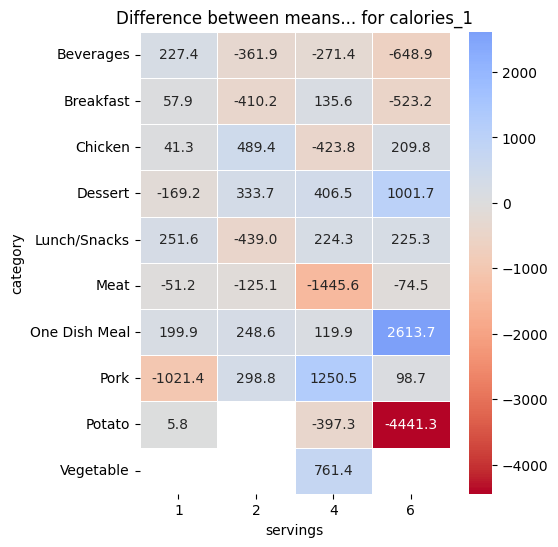

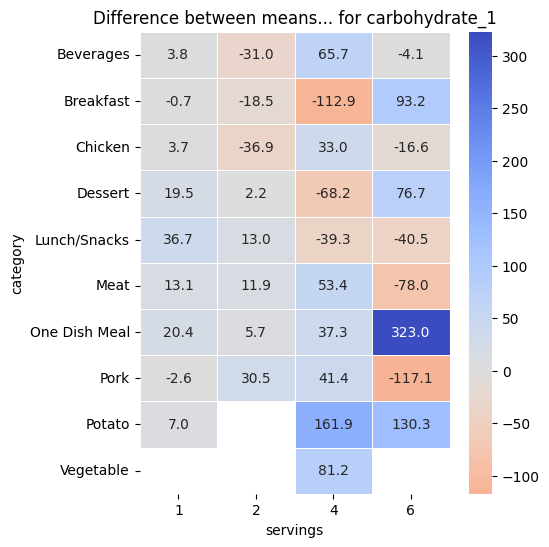

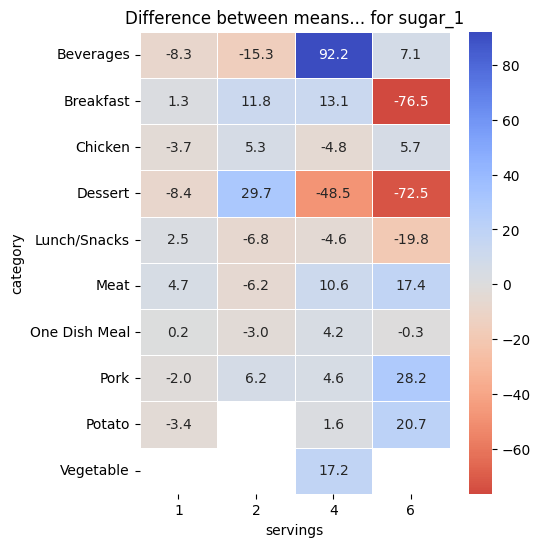

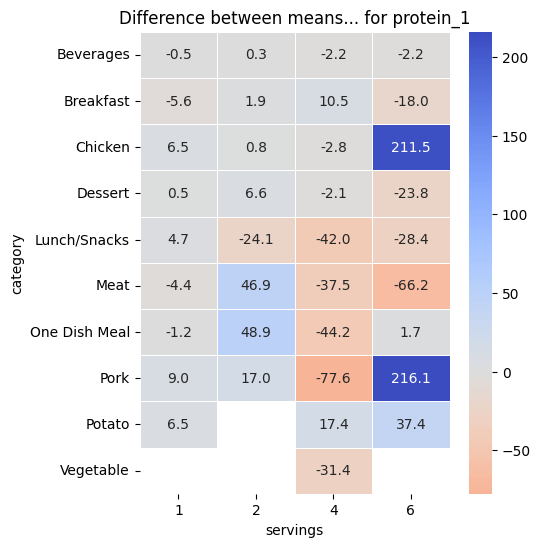

In [106]:
def diff_for_numerical(df2, name):
    df2_high_agg = pd.pivot_table(df2[df2['high_traffic'] == 'High'], index=["category"], columns=["servings"], values=name, aggfunc=np.mean) # 

    df2_low_agg = pd.pivot_table(df2[df2['high_traffic'] == 'Low'], index=["category"], columns=["servings"], values=name, aggfunc=np.mean)

    df2_diff = df2_high_agg.subtract(df2_low_agg)
    
    f, ax = plt.subplots(figsize=(5, 6))
    sns.heatmap(df2_diff, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm_r", center=0) # "coolwarm" ["pink","lightgreen"] # cmaplist
    plt.title('Difference between means... for {0}'.format(name))
    plt.show()
    
    return df2_diff

for name in nutritional_1:
    diff_for_numerical(df2, name)

<Axes: xlabel='high_traffic'>

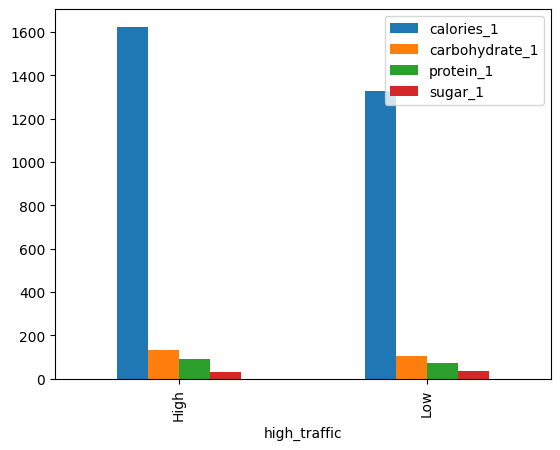

In [107]:
# df = data_pv.pivot(index='category', columns='gender', values='no_show_prop')
num_pivot_df = pd.pivot_table(df2, index=["high_traffic"], values=nutritional_1, aggfunc=np.mean) # values=name, 
num_pivot_df.plot(kind='bar')

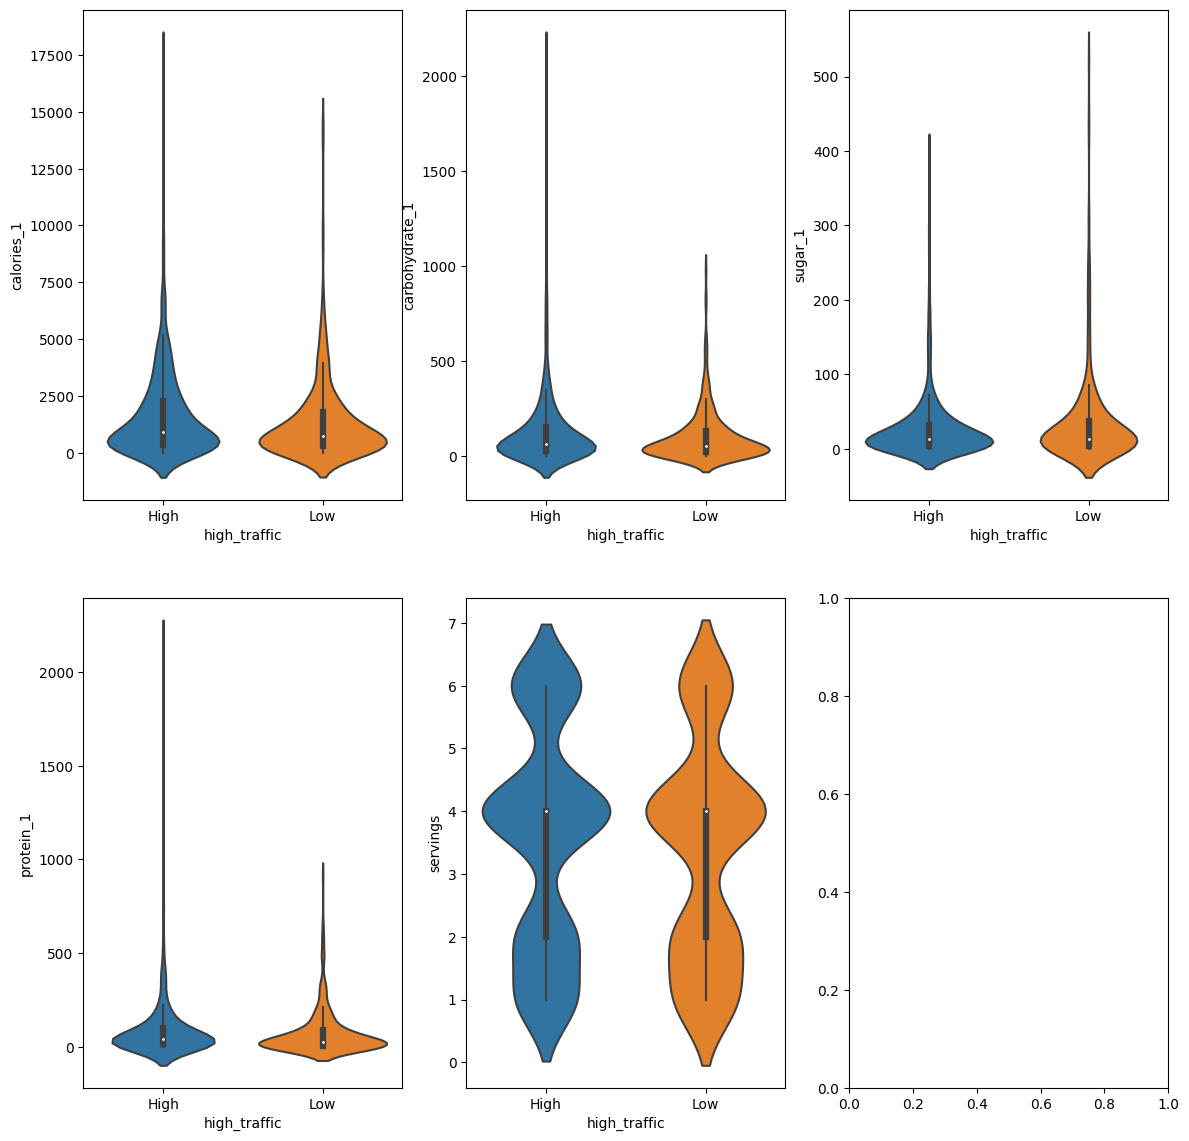

In [108]:
fig, ax = plt.subplots(2, 3, figsize=(14,14))
for name, ax in zip(num_names_1, ax.ravel()):
    sns.violinplot(data=df2, x='high_traffic', y=name, split=True, ax=ax)
plt.show()

/var/folders/fh/jv92z4dx5j9g6t17kwcrwbr40000gn/T/ipykernel_1875/3945427864.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2, hue='high_traffic', x=name, shade=True, ax=ax)
/var/folders/fh/jv92z4dx5j9g6t17kwcrwbr40000gn/T/ipykernel_1875/3945427864.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2, hue='high_traffic', x=name, shade=True, ax=ax)
/var/folders/fh/jv92z4dx5j9g6t17kwcrwbr40000gn/T/ipykernel_1875/3945427864.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2, hue='high_traffic', x=name, shade=True, ax=ax)
/var/folders/fh/jv92z4dx5j9g6t17kwcrwbr40000gn/T/ipykernel_1875/3945427864.p

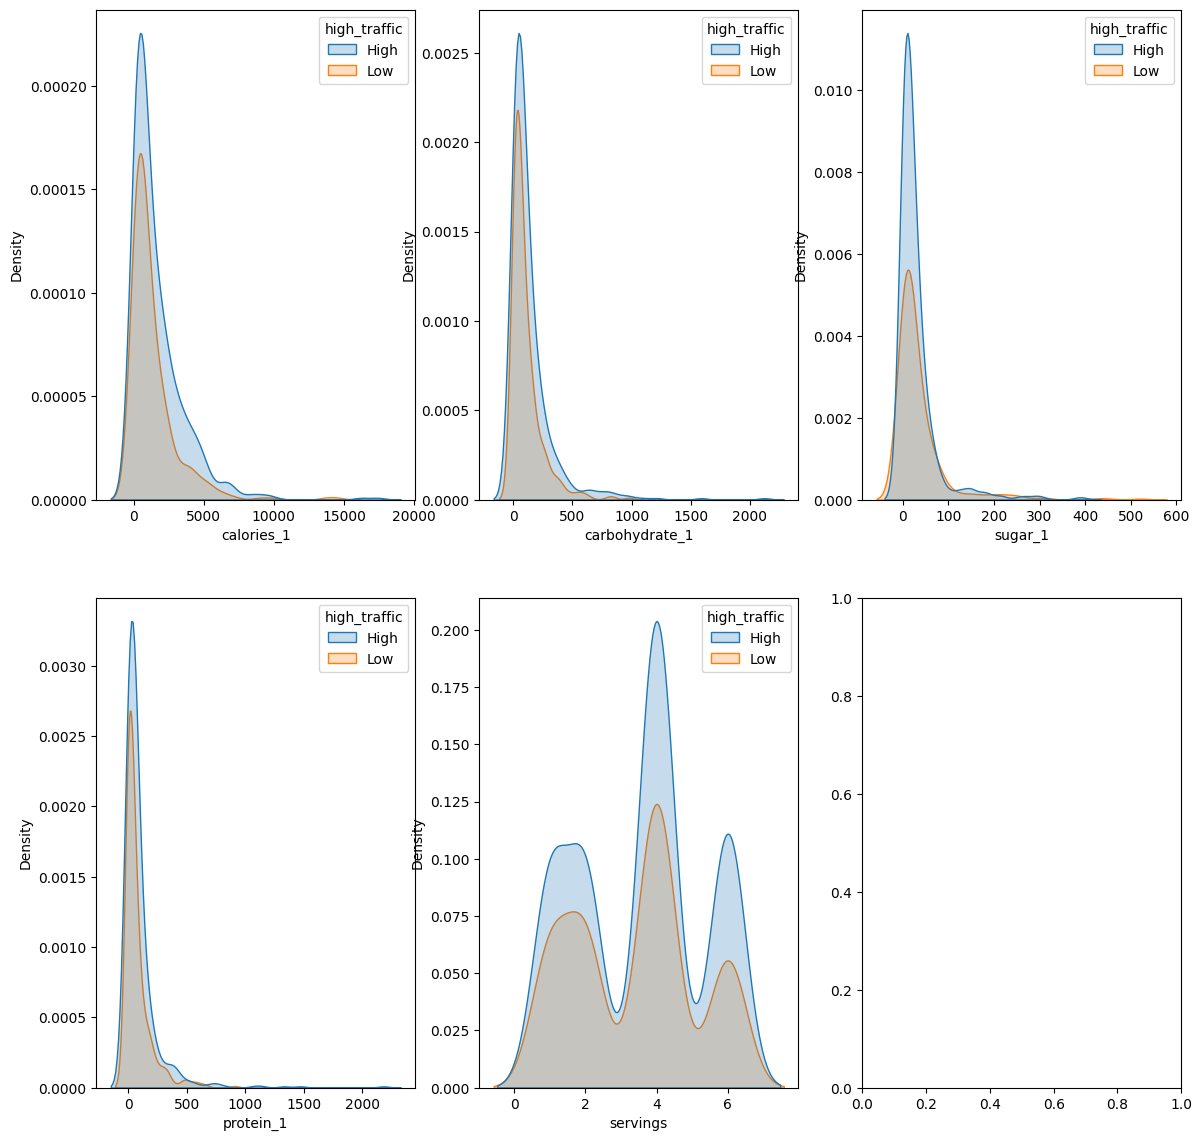

In [109]:
fig, ax = plt.subplots(2, 3, figsize=(14,14))
for name, ax in zip(num_names_1, ax.ravel()):
    sns.kdeplot(data=df2, hue='high_traffic', x=name, shade=True, ax=ax)
plt.show()

## Conclusion: 

The violin and the density plots shows that there are no significant depedencies of the traffic and the following numerical features: calories, carbohydrate, protein, sugar, servings. As I wrote above, there is no clear correlation between traffic and servings. The feature **category** has significant effect on the target variable.

# 3. Model Fitting

Predicting the high_traffic is a **binary classification problem** in machine learning. I am choosing the Logistic Regression, and Linear Support Vector Classification model as comparison model.


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

## Prepare Data for Modelling

To enable modelling, I chose **calories, carbohydrate, sugar, protein, servings, category** as features, **high_traffic** as target variables. I also have made the following changes:

- Convert the categorical variable **category** into numeric feature
- Normalize the numeric features
- Split the data into a training set and a test set

In [111]:
df3 = df2[list(df2)]

# Convert the categorical variables into numeric features
labelencoder = LabelEncoder()
df3['category'] = labelencoder.fit_transform(df3['category'])
df3['high_traffic'] = df3['high_traffic'].replace({"High": 1, "Low": 0})

X = df3[num_names_1 + ['category']] # Features
y = df3['high_traffic'] # Target variable

# Normalize the numeric features
scaler = StandardScaler()
X[num_names_1] = scaler.fit_transform(X[num_names_1])

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/var/folders/fh/jv92z4dx5j9g6t17kwcrwbr40000gn/T/ipykernel_1875/1866312894.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_names_1] = scaler.fit_transform(X[num_names_1])


In [112]:
# labels_dict = dict(zip(labelencoder.classes_, range(len(labelencoder.classes_))))

## **Model 1. Logistic Regression**

In [160]:
"""
grid = {
    "C": np.logspace(-3, 3, 7), # from -0.001 to 1000 by 7 steps
    "penalty": ["l1", "l2", "elasticnet", None],
    "multi_class": ["auto", "ovr", "multinomial"],
    "dual": [True, False],
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=10)
print("Tuned hyperparameters:", logreg_cv.best_params_)
"""
best_params = {'C': 0.01, 'dual': False, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}
logreg_cv = LogisticRegression(**best_params)
logreg_cv.fit(X_train, y_train)



LogisticRegression(C=0.01, penalty='l1', solver='saga')

## Model 2: Linear Support Vector Classification

In [161]:
"""
grid = {
    "C": np.logspace(-3, 3, 7), # from -0.001 to 1000 by 7 steps
    "penalty": ["l1", "l2"],
    "loss": ["hinge", "squared_hinge"],
    "dual": [True, False],
    "max_iter": [1000, 10000, 100000],
}

svm = LinearSVC()
svm_cv = GridSearchCV(svm, grid, cv=10)
print("Tuned hyperparameters:", svm_cv.best_params_)
"""
best_params = {'C': 100.0, 'dual': True, 'loss': 'hinge', 'max_iter': 100000, 'penalty': 'l2'}
svm_cv = LinearSVC(**best_params)
svm_cv.fit(X_train, y_train)

/Users/german/Library/Python/3.11/lib/python/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100.0, loss='hinge', max_iter=100000)

## Model 3: Naive Bayes Classification

In [162]:
"""
mnb = MultinomialNB(force_alpha=True)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
mnb.fit(X_train, y_train)
print(mnb.get_params(deep=True))
#print(clf.predict(X_test))
"""
"""
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gnb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1, scoring='accuracy')
gnb.fit(X_train, y_train)
print(gnb.best_estimator_)
"""
gnb = GaussianNB(var_smoothing=0.8111308307896871)
gnb.fit(X_train, y_train)
#print(gnb.get_params(deep=True))

GaussianNB(var_smoothing=0.8111308307896871)

## Model 4: Gradient Boosting Classifier

In [163]:
X = df3[num_names_1 + ['category']] # Features
y = df3['high_traffic'] # Target variable

# Normalize the numeric features
scaler = StandardScaler()
X[num_names_1] = scaler.fit_transform(X[num_names_1])

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ['squared_error', 'friedman_mse'],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }


#passing the scoring function in the GridSearchCV
gbc = GridSearchCV(GradientBoostingClassifier(), parameters,scoring="accuracy",refit=False,cv=2, n_jobs=-1)

gbc.fit(X_train, y_train)
gbc.best_params_
"""
best_params = {'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'log_loss',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.17272727272727273,
 'min_samples_split': 0.1,
 'n_estimators': 10,
 'subsample': 0.618}

gbc = GradientBoostingClassifier(**best_params)
gbc.fit(X_train, y_train)

/var/folders/fh/jv92z4dx5j9g6t17kwcrwbr40000gn/T/ipykernel_1875/1477742218.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_names_1] = scaler.fit_transform(X[num_names_1])


GradientBoostingClassifier(learning_rate=0.2, max_depth=8, max_features='sqrt',
                           min_samples_leaf=0.17272727272727273,
                           min_samples_split=0.1, n_estimators=10,
                           subsample=0.618)

## Model 5: XGBoost Classifier Model

In [164]:
"""
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(X, y)

grid_search.best_params_
"""

"\nestimator = XGBClassifier(\n    objective= 'binary:logistic',\n    nthread=4,\n    seed=42\n)\n\nparameters = {\n    'max_depth': range (2, 10, 1),\n    'n_estimators': range(60, 220, 40),\n    'learning_rate': [0.1, 0.01, 0.05]\n}\n\ngrid_search = GridSearchCV(\n    estimator=estimator,\n    param_grid=parameters,\n    scoring = 'roc_auc',\n    n_jobs = 10,\n    cv = 10,\n    verbose=True\n)\n\ngrid_search.fit(X, y)\n\ngrid_search.best_params_\n"

In [165]:
best_params = {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
xgb = XGBClassifier(**best_params)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# 4. Model Evaluation

For the evaluation, I am choosing **Precision, Recall** and **F1 Score**. Precision measures the percentage of true positives among retrieved positives, recall measures the percentage of true negatives among retrieved negatives, while F1 Score is a harmonic mean of precision and recall.

In [166]:
logreg2 = LogisticRegression(C=0.001, multi_class='multinomial', penalty="l2") # best parameters
logreg2.fit(X_train, y_train)
y_pred_logreg = logreg2.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification report:\n", classification_report(y_test, y_pred_logreg))
# y_pred_probs_logreg = logreg2.predict_proba(X_test)[:, 1]
# print(y_pred_probs_logreg[0])
# print(roc_auc_score(y_test, y_pred_probs_logreg))

Confusion matrix:
 [[54 23]
 [22 91]]
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71        77
           1       0.80      0.81      0.80       113

    accuracy                           0.76       190
   macro avg       0.75      0.75      0.75       190
weighted avg       0.76      0.76      0.76       190



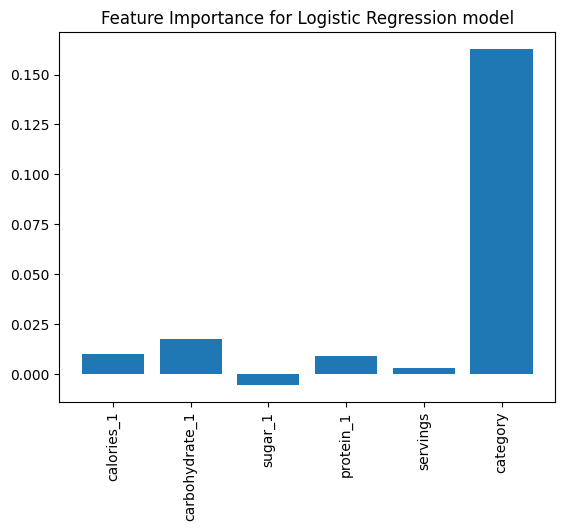

In [167]:
resultdict = {}
for i in range(len(list(X))):
    resultdict[list(X)[i]] = logreg2.coef_[0][i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance for Logistic Regression model');

As I noticed above, the category has the main effect on High traffic.

In [168]:
svm2 = LinearSVC(C=0.01, loss='squared_hinge', penalty='l2') # best parameters
svm2.fit(X_train, y_train)
y_pred_svm = svm2.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification report:\n", classification_report(y_test, y_pred_svm))

Confusion matrix:
 [[51 26]
 [23 90]]
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.68        77
           1       0.78      0.80      0.79       113

    accuracy                           0.74       190
   macro avg       0.73      0.73      0.73       190
weighted avg       0.74      0.74      0.74       190



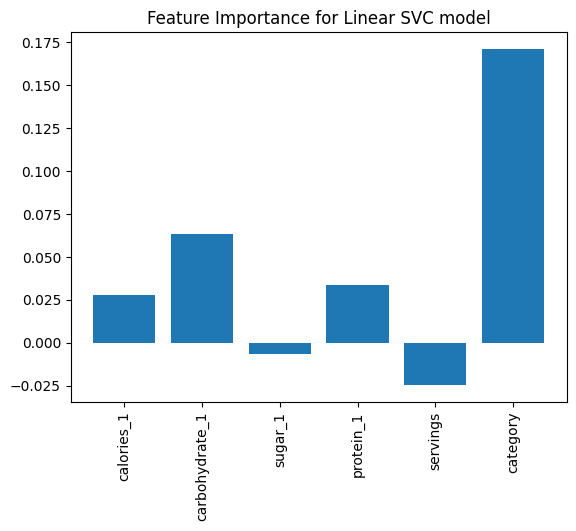

In [169]:
resultdict = {}
for i in range(len(list(X))):
    resultdict[list(X)[i]] = svm2.coef_[0][i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance for Linear SVC model');

In [170]:
#print(mnb.score(X_test, y_test))
y_pred_mnb = mnb.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("Classification report:\n", classification_report(y_test, y_pred_mnb))

Confusion matrix:
 [[  5  72]
 [  1 112]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.06      0.12        77
           1       0.61      0.99      0.75       113

    accuracy                           0.62       190
   macro avg       0.72      0.53      0.44       190
weighted avg       0.70      0.62      0.50       190



/Users/german/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [171]:
y_pred_gnb = gnb.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("Classification report:\n", classification_report(y_test, y_pred_gnb))

Confusion matrix:
 [[53 24]
 [24 89]]
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        77
           1       0.79      0.79      0.79       113

    accuracy                           0.75       190
   macro avg       0.74      0.74      0.74       190
weighted avg       0.75      0.75      0.75       190



In [172]:
y_pred_gbc = gbc.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_gbc))
print("Classification report:\n", classification_report(y_test, y_pred_gbc))

Confusion matrix:
 [[35 42]
 [15 98]]
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.45      0.55        77
           1       0.70      0.87      0.77       113

    accuracy                           0.70       190
   macro avg       0.70      0.66      0.66       190
weighted avg       0.70      0.70      0.68       190



In [173]:
y_pred_xgb = xgb.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification report:\n", classification_report(y_test, y_pred_xgb))

Confusion matrix:
 [[54 23]
 [22 91]]
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71        77
           1       0.80      0.81      0.80       113

    accuracy                           0.76       190
   macro avg       0.75      0.75      0.75       190
weighted avg       0.76      0.76      0.76       190



**Conclusion:**

Precision, Recall and F1 Score of High traffic by the Logistic Regression model are 0.82, 0.80, 0.81, and by Linear Support Vector Classification model are 0.80, 0.77, 0.79. That means the **Logistic Regression model fits the features better and has less error in predicting values**.

# 5. Business Focus & Metrics

## The business goals

There are 2 business goals:

1. **to predict which recipes will be with high traffic**;

2. **to predict the "High" value of traffic of the recipes with 80% probability**. 

The Logistic Regression model has achieved both goals, because it has high rates of Precision, Recall and F1 Score are more or equal 80%.


## Recommendations for future actions

To help Product Manager predict the high traffic of the recipes, we can deploy this Logistic Regression Model into production. By implementing this model, about 81% of the prediction will make sure the traffic will be high. This will help Product Manager build their confidence in generating more traffic to the rest of the website.

To implement and improve the model, I will consider the following steps:

- Looking for best ways to deploy this model in terms of performance and costs. The ideal way is to deploy this machine learning model on edge devices for its convenience and security and test the model in newly hired product analysts.
- Collecting more data, e.g. **time to make**, **cost per serving**, **ingredients**, **site duration time** (how long users were at the recipe page), **income links** (from what sites users came to the recipe page), **combinations of recipes** (what recipes user visited at the same session with the current recipe).
- Feature Engineering, e.g increase number of values in **category**, create more meaningful features from the variables.

**Predictive system**

Let's check Logistic Regression model for any recipe from test data:

In [174]:
n = 3  # n = 0, ..., len(X_test)
X_new = X_test.iloc[[n]]
y_pred_new = logreg2.predict(X_new)

if y_pred_new[0] == 1:
    print('The traffic is high')
else:
    print('The traffic is not high')

The traffic is high


## KPI and the performance of 5 models using KPI

The company wants to increase an accuracy of prediction of high traffic. Therefore, we would consider using **accuracy** of predictions which predicted high traffic as a KPI to compare 5 models again. The higher the percentage, the better the model performs. The **Logistic Regression model has 76.3%** of the accuracy whereas the accuracy of Linear SVC model is lower (74.2%), Multinomial Naive Bayes reached an accuracy of 62%, Gaussian Naive Bayes reached an accuracy of 66%, GradientBoostingClassifier reached an accuracy of 73% and the XGBoost Classifier reached a similiar accuracy like the Logistic Regression with 76.2%. 

In [175]:
# accuracy score on the train data
X_train_pred = logreg2.predict(X_train)
print('Accuracy score of the train data: ', accuracy_score(X_train_pred, y_train))

# accuracy score on the test data
X_test_pred = logreg2.predict(X_test)
print('Accuracy score of the test data: ', accuracy_score(X_test_pred, y_test))

Accuracy score of the train data:  0.7635402906208718
Accuracy score of the test data:  0.7631578947368421


In [176]:
# accuracy score on the train data
X_train_pred = svm2.predict(X_train)
print('Accuracy score of the train data: ', accuracy_score(X_train_pred, y_train))

# accuracy score on the test data
X_test_pred = svm2.predict(X_test)
print('Accuracy score of the test data: ', accuracy_score(X_test_pred, y_test))

Accuracy score of the train data:  0.7661822985468957
Accuracy score of the test data:  0.7421052631578947


In [177]:
# accuracy score on the train data
X_train_pred = mnb.predict(X_train)
print('Accuracy score of the train data: ', accuracy_score(X_train_pred, y_train))

# accuracy score on the test data
X_test_pred = mnb.predict(X_test)
print('Accuracy score of the test data: ', accuracy_score(X_test_pred, y_test))

Accuracy score of the train data:  0.6235138705416117
Accuracy score of the test data:  0.6157894736842106


/Users/german/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/Users/german/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [178]:
# accuracy score on the train data
X_train_pred = gnb.predict(X_train)
print('Accuracy score of the train data: ', accuracy_score(X_train_pred, y_train))

# accuracy score on the test data
X_test_pred = gnb.predict(X_test)
print('Accuracy score of the test data: ', accuracy_score(X_test_pred, y_test))

Accuracy score of the train data:  0.7595772787318362
Accuracy score of the test data:  0.7473684210526316


In [179]:
# accuracy score on the train data
X_train_pred = gbc.predict(X_train)
print('Accuracy score of the train data: ', accuracy_score(X_train_pred, y_train))

# accuracy score on the test data
X_test_pred = gbc.predict(X_test)
print('Accuracy score of the test data: ', accuracy_score(X_test_pred, y_test))

Accuracy score of the train data:  0.7490092470277411
Accuracy score of the test data:  0.7


In [180]:
# accuracy score on the train data
X_train_pred = xgb.predict(X_train)
print('Accuracy score of the train data: ', accuracy_score(X_train_pred, y_train))

# accuracy score on the test data
X_test_pred = xgb.predict(X_test)
print('Accuracy score of the test data: ', accuracy_score(X_test_pred, y_test))

Accuracy score of the train data:  0.76221928665786
Accuracy score of the test data:  0.7631578947368421
